In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib as mpl
 
mpl.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()
# 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
df['기준년월'].value_counts()

202003    135706
202103    128725
201909    109747
202009     76858
201903     68261
Name: 기준년월, dtype: int64

In [5]:
print(df[df['고객소재지_광역시도'] != '서울특별시'].shape[0])
print(df[df['고객소재지_광역시도'] == '서울특별시'].shape[0])
df = df[df['고객소재지_광역시도'] == '서울특별시']
df_1903 = df[df['기준년월'] == 202103]

213175
306122


In [6]:
df_1903.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
390089,202103,11,패션잡화,1111,신발,여성,50대,성인자녀가구,서울특별시,구로구,궁동,318490,7
390090,202103,11,패션잡화,1110,양말,여성,50대,성인자녀가구,서울특별시,강동구,길동,1469083,19
390091,202103,20,여가/스포츠,2013,여행,남성,30대,1인가구,서울특별시,강동구,길동,1042413,30
390092,202103,20,여가/스포츠,2010,스포츠,남성,40대,초중고자녀가구,서울특별시,강동구,길동,140273,5
390093,202103,17,생활,1710,생활용품,여성,60대 이상,노인가구,서울특별시,강동구,길동,428515,21
390094,202103,11,패션잡화,1110,양말,여성,30대,신혼영유아가구,서울특별시,광진구,능동,45597,5
390095,202103,15,전자,1511,디지털,남성,30대,신혼영유아가구,서울특별시,광진구,능동,1193531,14
390099,202103,11,패션잡화,1112,가방,남성,40대,초중고자녀가구,서울특별시,양천구,목동,1242008,10
390100,202103,15,전자,1510,가전,여성,20대,1인가구,서울특별시,양천구,목동,3300270,31
390101,202103,13,가구,1314,기타,여성,30대,1인가구,서울특별시,양천구,목동,244110,5


In [7]:
df_1903_test = df_1903
df_1903_test['1회금액'] = round(df_1903_test['매출금액']/df_1903_test['매출건수'],)
df_1903_test

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수,1회금액
390089,202103,11,패션잡화,1111,신발,여성,50대,성인자녀가구,서울특별시,구로구,궁동,318490,7,45499.0
390090,202103,11,패션잡화,1110,양말,여성,50대,성인자녀가구,서울특별시,강동구,길동,1469083,19,77320.0
390091,202103,20,여가/스포츠,2013,여행,남성,30대,1인가구,서울특별시,강동구,길동,1042413,30,34747.0
390092,202103,20,여가/스포츠,2010,스포츠,남성,40대,초중고자녀가구,서울특별시,강동구,길동,140273,5,28055.0
390093,202103,17,생활,1710,생활용품,여성,60대 이상,노인가구,서울특별시,강동구,길동,428515,21,20405.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519292,202103,20,여가/스포츠,2013,여행,여성,30대,1인가구,서울특별시,영등포구,영등포동7가,1411368,7,201624.0
519293,202103,21,e상품/서비스,2110,o2o서비스,남성,30대,1인가구,서울특별시,영등포구,영등포동7가,1386040,63,22001.0
519294,202103,11,패션잡화,1113,시계/주얼리,여성,30대,신혼영유아가구,서울특별시,영등포구,영등포동7가,390818,7,55831.0
519295,202103,16,식품,1610,가공식품,남성,40대,초중고자녀가구,서울특별시,영등포구,영등포동7가,327592,7,46799.0


In [8]:
sigoongu = list(set(df_1903['고객소재지_시군구']))
print(len(sigoongu))

25


In [9]:
big_category = list(set(df_1903['품목대분류명']))
print(len(big_category))

middle_category = list(set(df_1903['품목중분류명']))
print(len(middle_category))

13
50


In [10]:
lifestyle = list(set(df_1903['가구생애주기']))
print(len(lifestyle))
lifestyle

5


['신혼영유아가구', '성인자녀가구', '초중고자녀가구', '1인가구', '노인가구']

지역별 매출
송파구     5207
강남구     5177
마포구     4719
영등포구    4302
성북구     4042
은평구     3691
강동구     3637
강서구     3545
성동구     3378
서대문구    3211
용산구     3152
구로구     3091
서초구     3080
동대문구    3020
동작구     2960
광진구     2607
노원구     2554
중랑구     2451
종로구     1953
양천구     1851
도봉구     1791
관악구     1699
강북구     1580
중구      1443
금천구     1372
Name: 고객소재지_시군구, dtype: int64


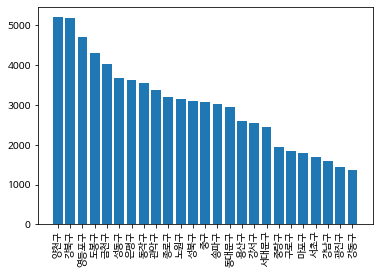

In [11]:
print('지역별 매출')
print(df_1903['고객소재지_시군구'].value_counts())
df_1903_total = df_1903['고객소재지_시군구'].value_counts().tolist()
# print(df_1903_total)

plt.bar(sigoongu, df_1903_total)
plt.xticks(rotation = 90)
plt.show()

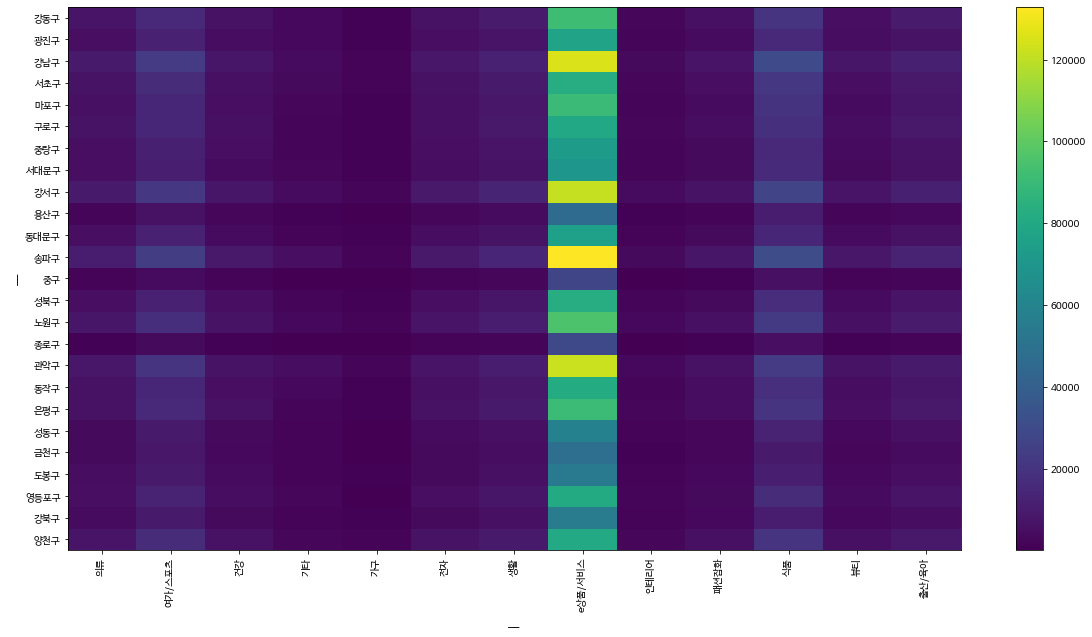

In [12]:
# 시군구 - 매출건수(품목대분류명)
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_moneycount_large = pd.DataFrame(pack, index=sigoongu)
sigoongu_moneycount_large = sigoongu_moneycount_large.fillna(0)
plt.figure(figsize=(20,10))
plt.pcolor(sigoongu_moneycount_large)
plt.xticks(np.arange(0.5, len(sigoongu_moneycount_large.columns), 1), sigoongu_moneycount_large.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_moneycount_large.index), 1), sigoongu_moneycount_large.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [13]:
#  시군구 - 매출건수(품목대분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(ascending = False)

,의류,여가/스포츠,건강,기타,가구,전자,생활,e상품/서비스,인테리어,패션잡화,식품,뷰티,출산/육아
양천구,7.0,7.0,7.0,10.0,4.0,6.0,8.0,13.0,6.0,7.0,8.0,6.0,7.0
강북구,20.0,19.0,21.0,19.0,18.0,20.0,20.0,20.0,20.0,20.0,21.0,20.0,21.0
영등포구,14.0,13.0,15.0,11.0,21.0,15.0,14.0,12.0,17.0,18.0,14.0,16.0,14.0
도봉구,19.0,21.0,18.0,20.0,14.0,21.0,19.0,21.0,19.0,19.0,20.0,19.0,20.0
금천구,22.0,22.0,22.0,21.0,20.0,22.0,22.0,22.0,22.0,21.0,23.0,22.0,22.0
성동구,21.0,20.0,20.0,22.0,22.0,19.0,21.0,19.0,21.0,22.0,19.0,21.0,19.0
은평구,10.0,9.0,8.0,14.0,9.0,9.0,7.0,7.0,10.0,9.0,7.0,9.0,10.0
동작구,11.0,10.0,11.0,9.0,11.0,11.0,11.0,11.0,11.0,11.0,12.0,11.0,12.0
관악구,4.0,4.0,5.0,2.0,2.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,6.0
종로구,25.0,25.0,25.0,25.0,25.0,25.0,25.0,24.0,25.0,25.0,25.0,25.0,25.0


In [14]:
# 클러스터링 시도
# 시군구 - 매출건수(품목대분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_moneycount_large.values
kmeans = KMeans(n_clusters=5).fit(datapoints)
print(kmeans.labels_)

[1 3 1 3 3 3 4 1 2 0 4 1 0 2 1 3 2 1 1 1 4 1 2 1 4]


In [15]:
sigoongu_moneycount_large['cluster_id'] = kmeans.labels_
temp = sigoongu_moneycount_large[sigoongu_moneycount_large['cluster_id']==3]
temp['cluster_id']

강북구    3
도봉구    3
금천구    3
성동구    3
용산구    3
Name: cluster_id, dtype: int32

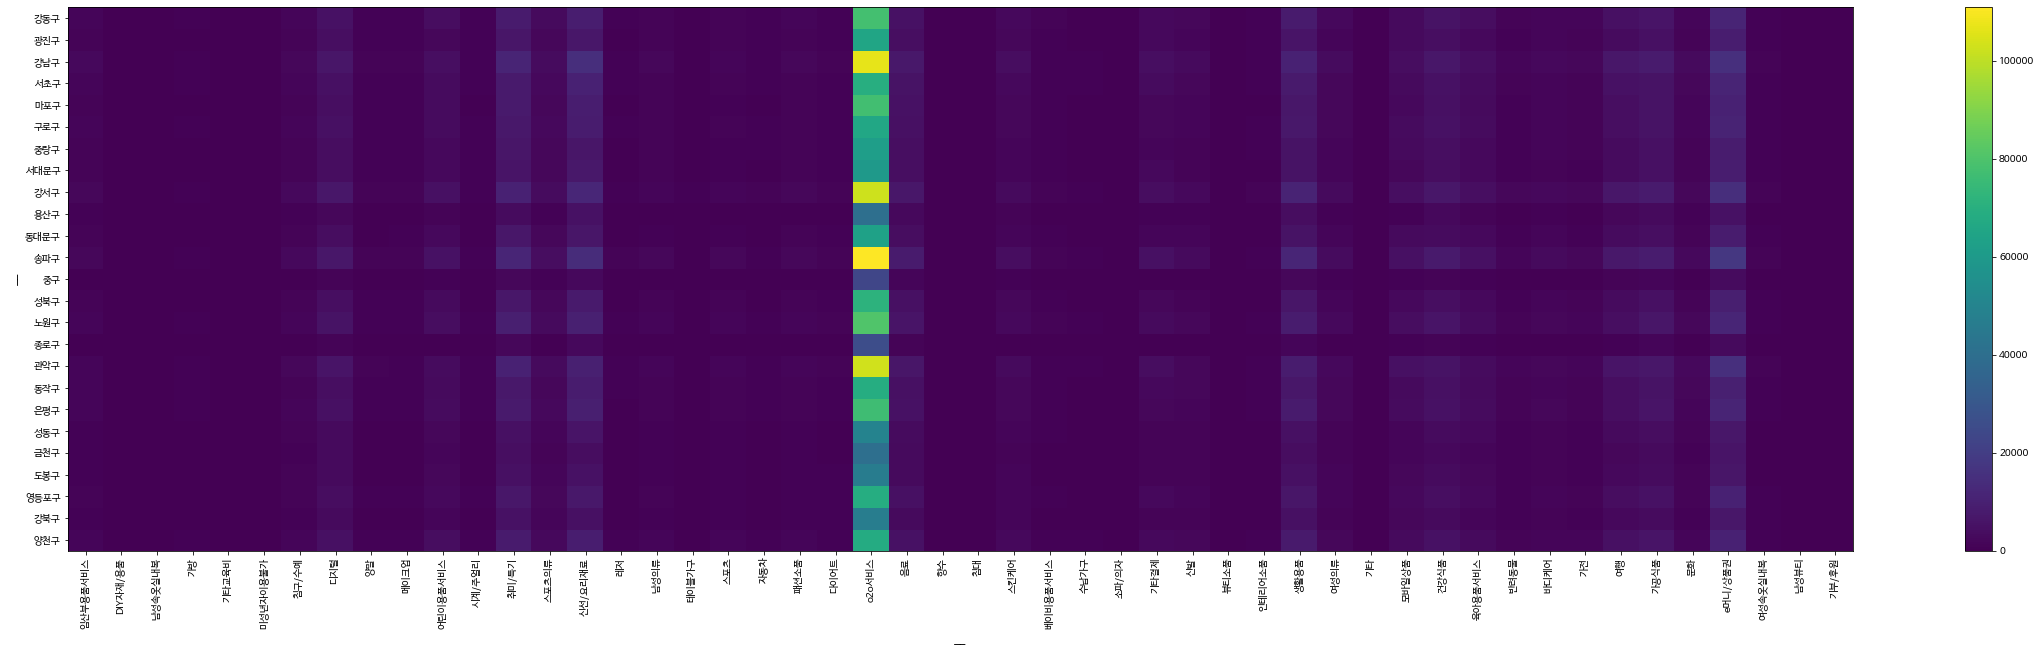

In [16]:
# 시군구 - 매출건수(품목중분류명)
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_moneycount_middle = pd.DataFrame(pack, index=sigoongu)
sigoongu_moneycount_middle = sigoongu_moneycount_middle.fillna(0)
plt.figure(figsize=(40,10))
plt.pcolor(sigoongu_moneycount_middle)
plt.xticks(np.arange(0.5, len(sigoongu_moneycount_middle.columns), 1), sigoongu_moneycount_middle.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_moneycount_middle.index), 1), sigoongu_moneycount_middle.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [17]:
#  시군구 - 매출건수(품목중분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(ascending = False)

,임산부용품서비스,DIY자재/용품,남성속옷실내복,가방,기타교육비,미성년자이용불가,침구/수예,디지털,양말,메이크업,...,반려동물,바디케어,가전,여행,가공식품,문화,e머니/상품권,여성속옷실내복,남성뷰티,기부/후원
양천구,4.0,5.0,5.0,6.0,7.0,3.5,7.0,7.0,8.0,5.0,...,6.0,7.0,4.0,7.0,8.0,8.0,12.0,7.0,4.0,1.0
강북구,22.0,17.0,12.0,15.0,15.0,9.0,21.0,20.0,20.0,19.0,...,16.0,20.0,20.0,20.0,21.0,22.0,19.0,15.0,21.5,19.0
영등포구,12.0,14.0,16.0,19.0,20.0,12.0,15.0,16.0,17.0,15.5,...,20.0,13.0,16.0,13.0,13.0,15.0,11.0,17.0,9.5,7.5
도봉구,20.0,18.0,12.0,20.0,18.0,19.0,19.0,22.0,19.0,20.0,...,15.0,21.0,19.0,21.0,20.0,20.0,21.0,20.0,11.5,19.0
금천구,21.0,20.0,18.0,21.0,23.0,12.0,22.0,21.0,22.0,21.0,...,21.0,22.0,22.0,22.0,22.0,21.0,22.0,21.0,13.0,19.0
성동구,19.0,22.0,21.0,22.0,22.0,12.0,20.0,19.0,21.0,22.0,...,22.0,19.0,21.0,19.0,19.0,18.0,20.0,22.0,21.5,4.0
은평구,9.0,13.0,15.0,10.0,21.0,15.5,9.0,10.0,10.0,10.0,...,8.0,6.0,9.0,11.0,6.0,10.0,7.0,9.0,16.5,19.0
동작구,10.0,12.0,9.0,11.0,4.0,12.0,11.0,11.0,12.0,9.0,...,10.0,11.0,10.0,9.0,12.0,5.0,13.0,11.0,16.5,5.0
관악구,5.0,3.0,2.0,2.0,2.0,1.0,4.0,4.0,4.0,4.0,...,4.0,4.0,6.0,4.0,4.0,3.0,3.0,4.0,1.0,2.0
종로구,25.0,25.0,25.0,25.0,19.0,23.5,25.0,25.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,24.5,19.0


In [18]:
# 클러스터링 시도
# 시군구 - 매출건수(품목중분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_moneycount_middle.values
kmeans = KMeans(n_clusters=5).fit(datapoints)
print(kmeans.labels_)

[3 4 3 4 4 4 1 3 2 0 1 3 0 2 3 4 2 3 3 3 1 3 2 3 1]


In [19]:
sigoongu_moneycount_middle['cluster_id'] = kmeans.labels_
temp = sigoongu_moneycount_middle[sigoongu_moneycount_middle['cluster_id']==3]
temp['cluster_id']

양천구     3
영등포구    3
동작구     3
성북구     3
동대문구    3
서대문구    3
중랑구     3
구로구     3
서초구     3
광진구     3
Name: cluster_id, dtype: int32

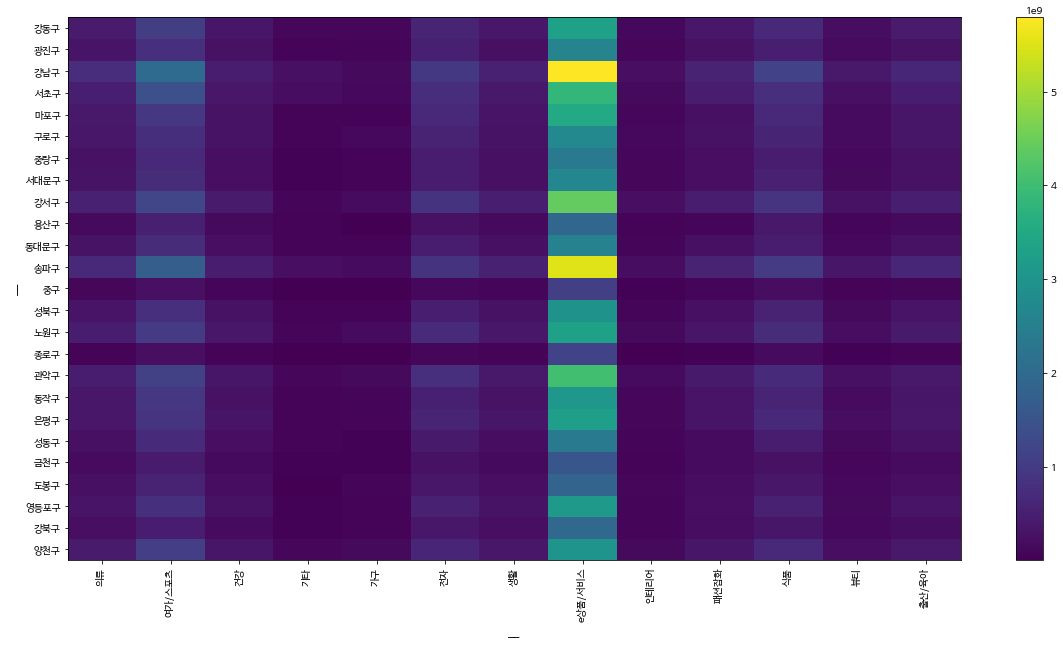

In [20]:
# 시군구 - 매출금액(품목대분류명)
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_money_large = pd.DataFrame(pack, index=sigoongu)
sigoongu_money_large = sigoongu_money_large.fillna(0)
plt.figure(figsize=(20,10))
plt.pcolor(sigoongu_money_large)
plt.xticks(np.arange(0.5, len(sigoongu_money_large.columns), 1), sigoongu_money_large.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_money_large.index), 1), sigoongu_money_large.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [21]:
# 시군구 - 매출금액(품목대분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(ascending= False)

,의류,여가/스포츠,건강,기타,가구,전자,생활,e상품/서비스,인테리어,패션잡화,식품,뷰티,출산/육아
양천구,7.0,6.0,6.0,6.0,6.0,8.0,8.0,12.0,6.0,7.0,9.0,6.0,7.0
강북구,21.0,22.0,21.0,21.0,14.0,20.0,19.0,20.0,19.0,19.0,22.0,20.0,21.0
영등포구,14.0,12.0,13.0,18.0,20.0,12.0,13.0,10.0,17.0,17.0,14.0,14.0,13.0
도봉구,20.0,20.0,20.0,23.0,13.0,21.0,20.0,22.0,13.0,20.0,21.0,21.0,20.0
금천구,22.0,23.0,23.0,22.0,21.0,23.0,22.0,23.0,23.0,22.0,23.0,22.0,22.0
성동구,19.0,18.0,19.0,9.0,22.0,19.0,21.0,18.0,20.0,21.0,17.0,17.0,17.0
은평구,10.0,11.0,9.0,14.0,10.0,10.0,9.0,9.0,10.0,10.0,8.0,9.0,9.0
동작구,11.0,10.0,12.0,13.0,12.0,13.0,12.0,11.0,12.0,9.0,11.0,10.0,10.0
관악구,5.0,5.0,7.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,6.0,4.0,8.0
종로구,25.0,25.0,25.0,25.0,25.0,25.0,25.0,24.0,25.0,25.0,25.0,25.0,25.0


In [22]:
# 클러스터링 시도
# 시군구 - 매출금액(품목대분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_money_large.values
kmeans = KMeans(n_clusters=5).fit(datapoints)
print(kmeans.labels_)

[0 2 0 2 2 4 0 0 3 2 0 0 2 1 4 2 3 4 4 4 0 3 1 4 0]


In [23]:
sigoongu_money_large['cluster_id'] = kmeans.labels_
temp = sigoongu_money_large[sigoongu_money_large['cluster_id']==3]
temp['cluster_id']

관악구    3
강서구    3
서초구    3
Name: cluster_id, dtype: int32

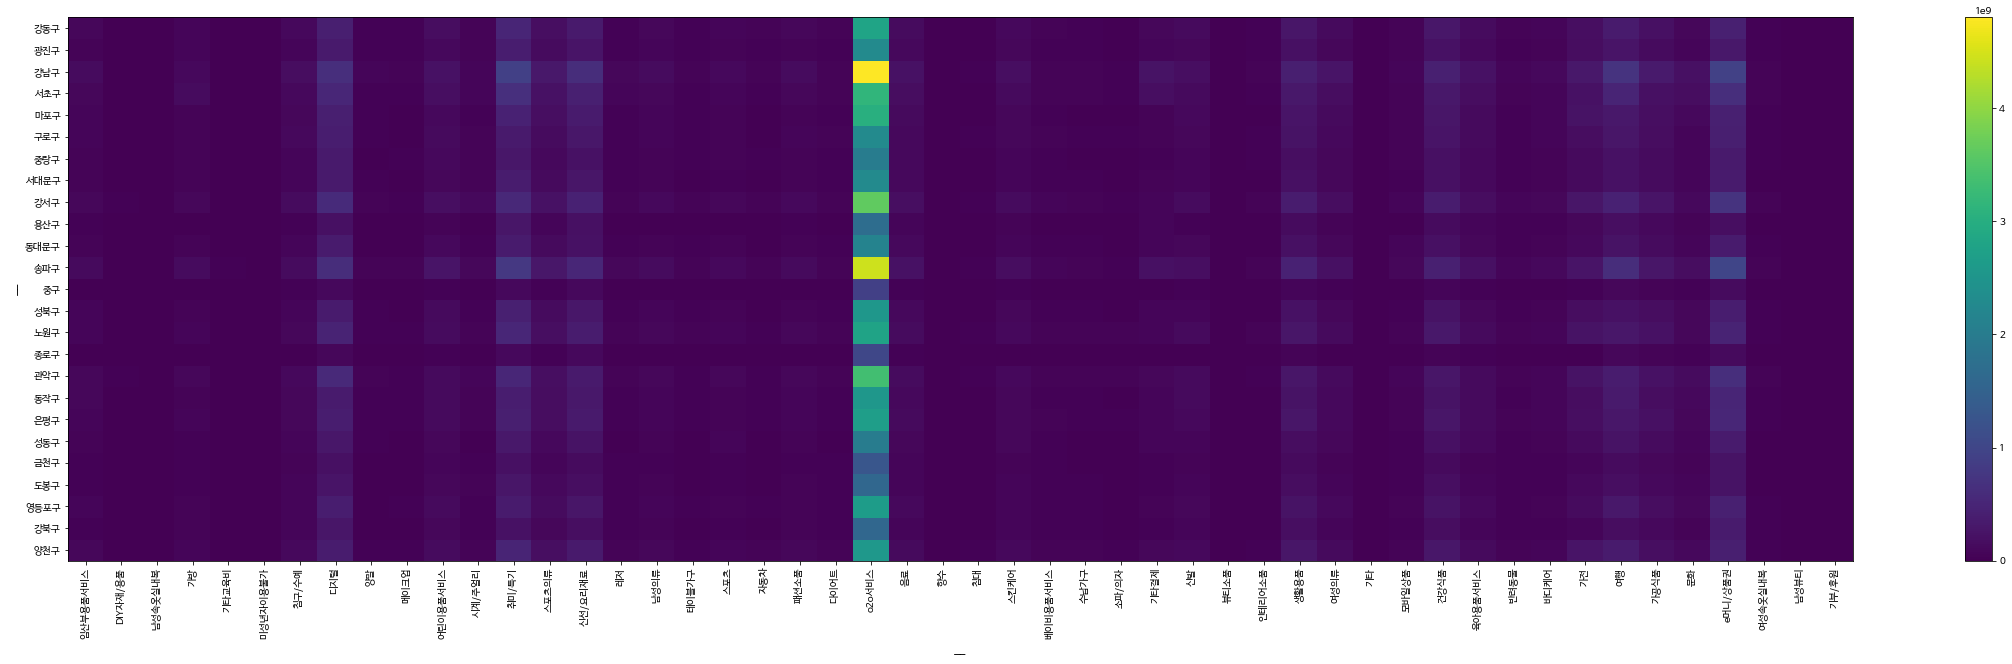

In [24]:
# 시군구 - 매출금액(품목중분류명)
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_money_middle = pd.DataFrame(pack, index=sigoongu)
sigoongu_money_middle = sigoongu_money_middle.fillna(0)
plt.figure(figsize=(40,10))
plt.pcolor(sigoongu_money_middle)
plt.xticks(np.arange(0.5, len(sigoongu_money_middle.columns), 1), sigoongu_money_middle, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_money_middle.index), 1), sigoongu_money_middle.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [25]:
#  시군구 - 매출금액(품목중분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(ascending = False)

,임산부용품서비스,DIY자재/용품,남성속옷실내복,가방,기타교육비,미성년자이용불가,침구/수예,디지털,양말,메이크업,...,반려동물,바디케어,가전,여행,가공식품,문화,e머니/상품권,여성속옷실내복,남성뷰티,기부/후원
양천구,8.0,5.0,5.0,6.0,8.0,2.0,7.0,12.0,6.0,5.0,...,9.0,6.0,4.0,6.0,9.0,6.0,12.0,8.0,4.0,2.0
강북구,21.0,17.0,16.0,15.0,15.0,10.0,19.0,20.0,21.0,18.0,...,19.0,20.0,22.0,22.0,22.0,23.0,18.0,17.0,20.0,19.0
영등포구,11.0,14.0,17.0,17.0,10.0,14.0,15.0,9.0,18.0,11.0,...,18.0,13.0,15.0,10.0,14.0,12.0,11.0,18.0,9.0,10.0
도봉구,20.0,4.0,14.0,22.0,19.0,17.0,16.0,21.0,20.0,21.0,...,13.0,21.0,20.0,21.0,20.0,20.0,21.0,21.0,12.0,19.0
금천구,22.0,20.0,18.0,21.0,18.0,12.0,22.0,22.0,22.0,22.0,...,21.0,22.0,23.0,23.0,23.0,21.0,22.0,20.0,18.0,19.0
성동구,18.0,23.0,21.0,20.0,20.0,13.0,20.0,19.0,16.0,20.0,...,23.0,19.0,18.0,16.0,17.0,18.0,16.0,22.0,22.0,6.0
은평구,10.0,15.0,15.0,7.0,14.0,9.0,10.0,10.0,14.0,9.0,...,7.0,8.0,9.0,12.0,7.0,9.0,6.0,10.0,13.0,19.0
동작구,6.0,16.0,12.0,14.0,16.0,16.0,11.0,14.0,12.0,7.0,...,12.0,12.0,13.0,8.0,11.0,5.0,7.0,11.0,19.0,5.0
관악구,5.0,2.0,6.0,4.0,7.0,1.0,5.0,4.0,3.0,6.0,...,4.0,4.0,6.0,5.0,4.0,4.0,4.0,5.0,1.0,3.0
종로구,25.0,25.0,25.0,25.0,25.0,23.5,25.0,25.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,24.5,19.0


In [26]:
# 클러스터링 시도
# 시군구 - 매출금액(품목중분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_money_middle.values
kmeans = KMeans(n_clusters=5).fit(datapoints)
print(kmeans.labels_)

[0 1 0 1 1 3 0 0 4 1 0 0 1 2 3 1 4 3 3 3 0 4 2 3 0]


In [27]:
sigoongu_money_middle['cluster_id'] = kmeans.labels_
temp = sigoongu_money_middle[sigoongu_money_middle['cluster_id']==3]
temp['cluster_id']

성동구     3
동대문구    3
서대문구    3
중랑구     3
구로구     3
광진구     3
Name: cluster_id, dtype: int32